In [12]:
import matplotlib.pyplot as plt
from dtaidistance import dtw
import pandas as pd
import numpy as np

In [13]:
# Construindo a classe do detector de drift (conforme implementado anteriormente)
class EmpiricalDTWDriftDetector:
    def __init__(self, fixed_window: np.ndarray, sliding_size: int, n_subsamples: int = 30):
        self.fixed_window = fixed_window
        self.sliding_size = sliding_size
        self.n_subsamples = n_subsamples
        self.distances = []
        self.mean = None
        self.std = None
        self._build_empirical_distribution3()

    def _build_empirical_distribution(self):
        max_start = len(self.fixed_window) - self.sliding_size
        
        samples = []
        for _ in range(self.n_subsamples):
            start = np.random.randint(0, max_start)
            subwindow = self.fixed_window[start:start + self.sliding_size]
            dist = dtw.distance(self.fixed_window, subwindow)
            samples.append(dist)

        self.distances = np.array(samples)
        self.mean = np.mean(self.distances)
        self.min = np.min(self.distances)
        self.std = np.std(self.distances)
        
    def _build_empirical_distribution2(self):
        samples = []
        window_length = len(self.fixed_window)

        # Garante que só irá gerar janelas completas
        for start in range(0, window_length, self.sliding_size):
            end = start + self.sliding_size
            if end > window_length:
                break  # Evita janelas incompletas no final
            subwindow = self.fixed_window[start:end]
            dist = dtw.distance(self.fixed_window, subwindow)
            samples.append(dist)

        self.distances = np.array(samples)
        self.mean = np.mean(self.distances)
        self.min = np.min(self.distances)
        self.std = np.std(self.distances)
        
    def _build_empirical_distribution3(self):
        samples = []
        window_length = len(self.fixed_window)
        step = (window_length - self.sliding_size) // (self.n_subsamples - 1)

        for i in range(self.n_subsamples):
            start = i * step
            end = start + self.sliding_size
            if end > window_length:
                break  # Evita janelas incompletas
            subwindow = self.fixed_window[start:end]
            dist = dtw.distance(self.fixed_window, subwindow)
            samples.append(dist)

        self.distances = np.array(samples)
        self.mean = np.mean(self.distances)
        self.min = np.min(self.distances)
        self.std = np.std(self.distances)

    def test_window(self, sliding_window: np.ndarray):
        dist = dtw.distance(self.fixed_window, sliding_window)
        if dist > self.min + 1 * self.std:
            status = 'drift'
        elif dist > self.min:
            status = 'warning'
        else:
            status = 'normal'
        return dist, status

    def get_empirical_info(self):
        return {'min': self.min, 'mean': self.mean, 'std': self.std, 'distances': self.distances}
    

In [14]:
# Função para carregar a série do arquivo CSV
def load_series(file_path):
    # Ignora as duas primeiras linhas e lê os dados
    df = pd.read_csv(file_path, skiprows=2, names=["Date", "Close"])

    # Remove valores NaN e retorna como array
    return df["Close"].dropna().values.reshape(-1, 1)

In [15]:
# Carregando a série temporal do arquivo
file_path = '../series/B3SA3.SA.csv'  # Ajuste o caminho para onde o seu arquivo está localizado
original_series = load_series(file_path)[:1000]

In [16]:
# Definindo a janela fixa e o tamanho da janela deslizante
batch_size = 200
fixed_window = original_series[:batch_size]
sliding_size = batch_size # Tamanho da janela deslizante

In [17]:
# Criando o detector
detector = EmpiricalDTWDriftDetector(fixed_window=fixed_window, sliding_size = int(batch_size/2), n_subsamples=10)
detector.get_empirical_info()

{'min': 15.549994685710189,
 'mean': 25.86613933774253,
 'std': 5.3705310738631065,
 'distances': array([24.0878248 , 18.22792412, 15.54999469, 25.57131599, 32.63404433,
        33.16004989, 27.74432902, 25.0015859 , 26.78180231, 29.90252234])}

In [18]:
print("Média: ", detector.mean)
print("Mínimo: ", detector.min)
print("Mínimo - Desvio: ", detector.min - detector.std)

Média:  25.86613933774253
Mínimo:  15.549994685710189
Mínimo - Desvio:  10.179463611847083


In [19]:
distances = [0] * batch_size
statuses = ['normal'] * batch_size
positions = list(range(0, batch_size))

In [20]:
for i in range(batch_size + 1, len(original_series)+1):  # ajustado para incluir o último bloco
    window = original_series[i - batch_size: i] 
    print("Sliding window at: [", str(i - batch_size), ",", i, "]")  
    dist, status = detector.test_window(window)
    distances.append(dist)
    statuses.append(status)
    positions.append(i+1)  # pegamos o último índice da janela deslizante"""

Sliding window at: [ 1 , 201 ]
Sliding window at: [ 2 , 202 ]
Sliding window at: [ 3 , 203 ]
Sliding window at: [ 4 , 204 ]
Sliding window at: [ 5 , 205 ]
Sliding window at: [ 6 , 206 ]
Sliding window at: [ 7 , 207 ]
Sliding window at: [ 8 , 208 ]
Sliding window at: [ 9 , 209 ]
Sliding window at: [ 10 , 210 ]
Sliding window at: [ 11 , 211 ]
Sliding window at: [ 12 , 212 ]
Sliding window at: [ 13 , 213 ]
Sliding window at: [ 14 , 214 ]
Sliding window at: [ 15 , 215 ]
Sliding window at: [ 16 , 216 ]
Sliding window at: [ 17 , 217 ]
Sliding window at: [ 18 , 218 ]
Sliding window at: [ 19 , 219 ]
Sliding window at: [ 20 , 220 ]
Sliding window at: [ 21 , 221 ]
Sliding window at: [ 22 , 222 ]
Sliding window at: [ 23 , 223 ]
Sliding window at: [ 24 , 224 ]
Sliding window at: [ 25 , 225 ]
Sliding window at: [ 26 , 226 ]
Sliding window at: [ 27 , 227 ]
Sliding window at: [ 28 , 228 ]
Sliding window at: [ 29 , 229 ]
Sliding window at: [ 30 , 230 ]
Sliding window at: [ 31 , 231 ]
Sliding window at

In [21]:
# Transformar em array para facilitar os filtros
distances_array = np.array(distances)
statuses_array = np.array(statuses)
positions_array = np.array(positions)

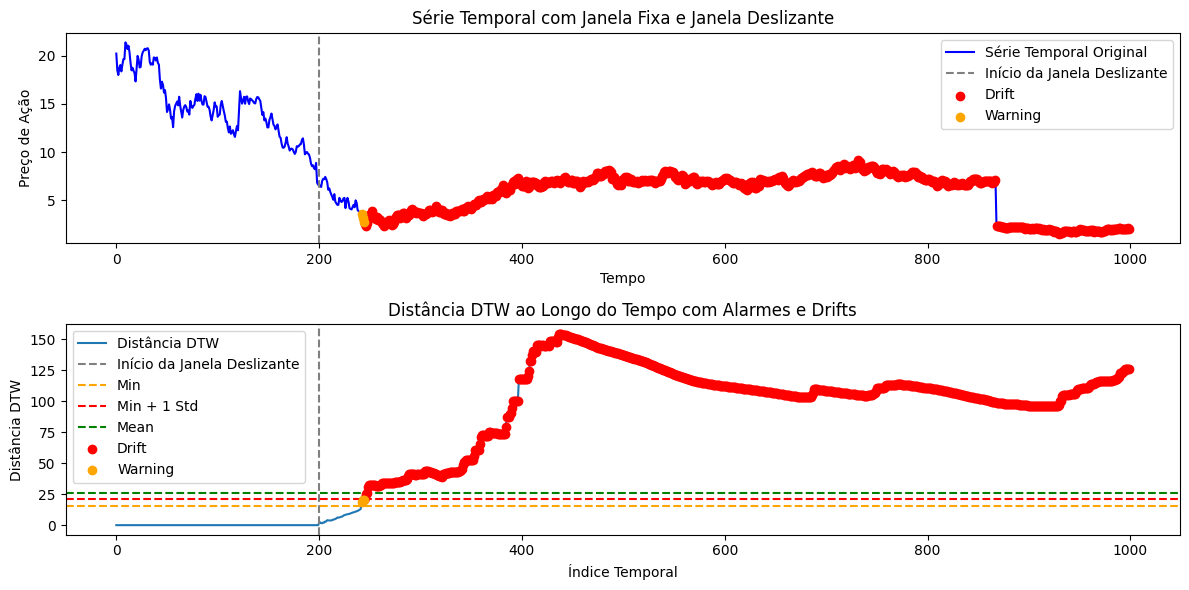

In [22]:
# Plot
plt.figure(figsize=(12, 6))

# Plotar alarmes e avisos nos lugares certos
alarm_idx = [idx for idx, status in enumerate(statuses_array) if status == 'drift']
warning_idx = [idx for idx, status in enumerate(statuses_array) if status == 'warning']

# Série temporal
ax1 = plt.subplot(2, 1, 1)
ax1.plot(original_series, label='Série Temporal Original', color='blue')
ax1.axvline(x=batch_size, color='gray', linestyle='--', label='Início da Janela Deslizante')
ax1.scatter(alarm_idx, [original_series[idx] for idx in alarm_idx], color='red', label='Drift', zorder=5)
ax1.scatter(warning_idx, [original_series[idx] for idx in warning_idx], color='orange', label='Warning', zorder=5)
ax1.title.set_text('Série Temporal com Janela Fixa e Janela Deslizante')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Preço de Ação')
ax1.legend()

# Distância DTW
ax2 = plt.subplot(2, 1, 2)
ax2.plot(distances, label='Distância DTW')
ax2.axvline(x=batch_size, color='gray', linestyle='--', label='Início da Janela Deslizante')

ax2.axhline(detector.min, color='orange', linestyle='--', label='Min')
ax2.axhline(detector.min + 1 * detector.std, color='red', linestyle='--', label='Min + 1 Std')
ax2.axhline(detector.mean, color='green', linestyle='--', label='Mean')

ax2.scatter(alarm_idx, distances_array[alarm_idx], color='red', label='Drift', zorder=5)
ax2.scatter(warning_idx, distances_array[warning_idx], color='orange', label='Warning', zorder=5)

ax2.title.set_text('Distância DTW ao Longo do Tempo com Alarmes e Drifts')
ax2.set_xlabel('Índice Temporal')
ax2.set_ylabel('Distância DTW')
ax2.legend()

plt.tight_layout()
plt.show()